In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('banknotes.csv')
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [6]:
df.shape

(1372, 5)

In [5]:
df.isna().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [7]:
x = df[['Variance','Skewness','Entropy','Curtosis']]
y = df['Class']

In [10]:
z = y.value_counts()

Class
0    762
1    610
Name: count, dtype: int64

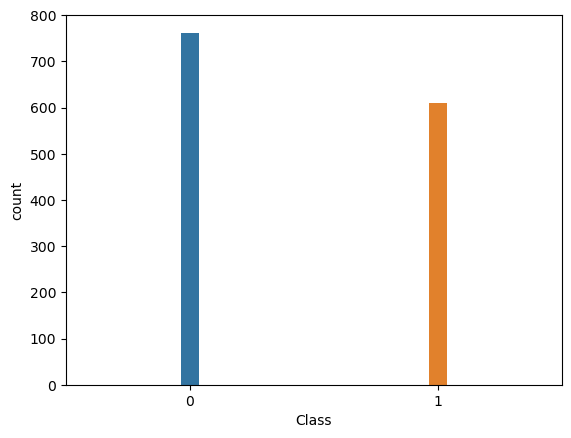

In [18]:
sns.countplot(x = y,width = 0.07);

## Cross Validation

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.25)

In [22]:
x_train.shape

(1029, 4)

In [23]:
y_train.shape

(1029,)

### Build the model

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dt = DecisionTreeClassifier(random_state=0)

In [26]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [31]:
# predict on test data

In [33]:
y_pred = dt.predict(x_test)

In [34]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [35]:
newdf = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})

In [37]:
newdf

,y_test,y_pred
1023,1,1
642,0,0
1196,1,1
31,0,0
253,0,0
...,...,...
866,1,1
361,0,0
703,0,0
328,0,0


### Model Evaluation

In [38]:
# confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay

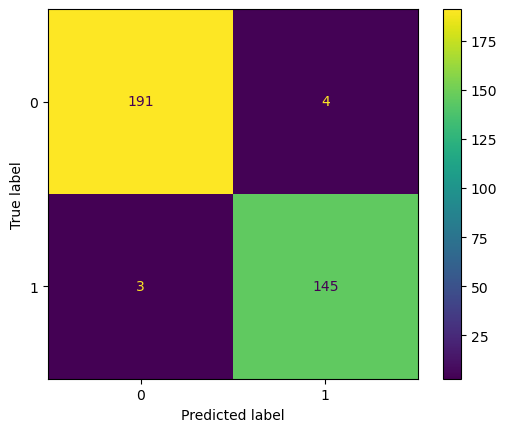

In [40]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

In [41]:
# classification report

In [42]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       195
           1       0.97      0.98      0.98       148

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



In [46]:
# Accuracy

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9795918367346939

In [47]:
# visualize the tree
from sklearn.tree import plot_tree

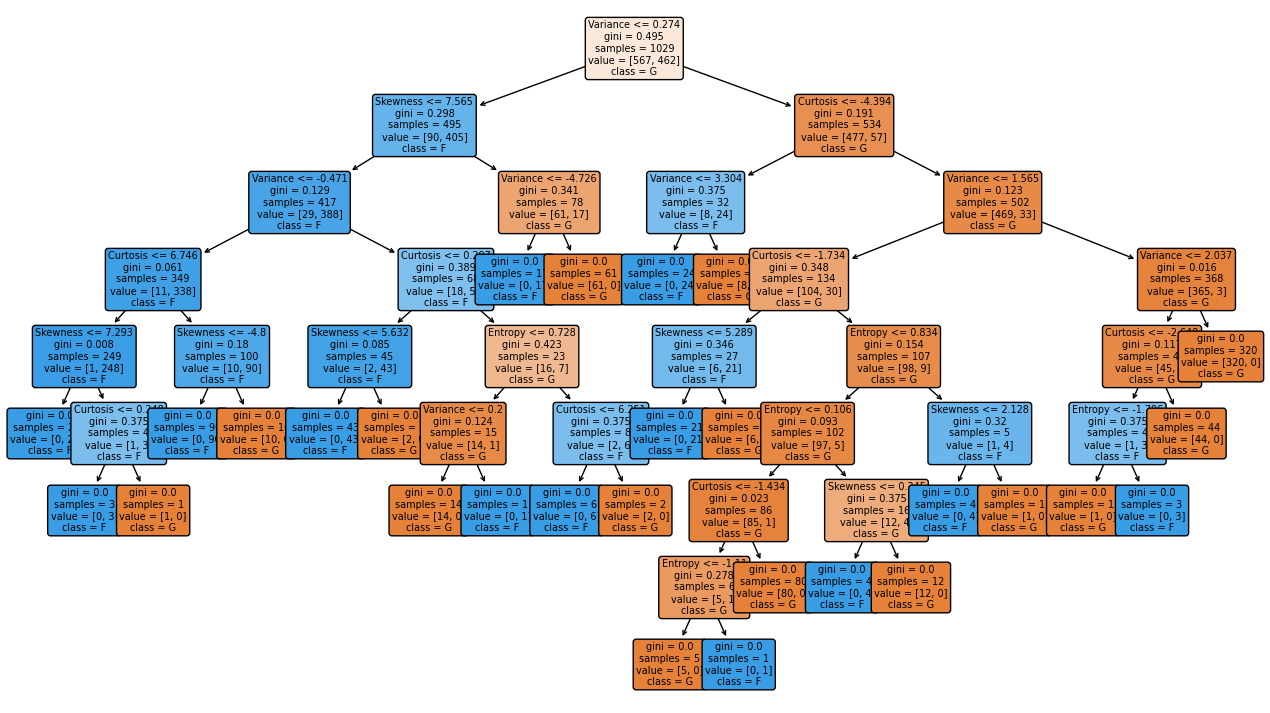

In [58]:
plt.figure(figsize=(16,9))
plot_tree(dt,rounded = True , class_names = ['G','F'],feature_names=x.columns,filled=True,fontsize=7);

In [71]:
z = dt.feature_importances_
z

array([0.62095248, 0.20812249, 0.02935987, 0.14156516])

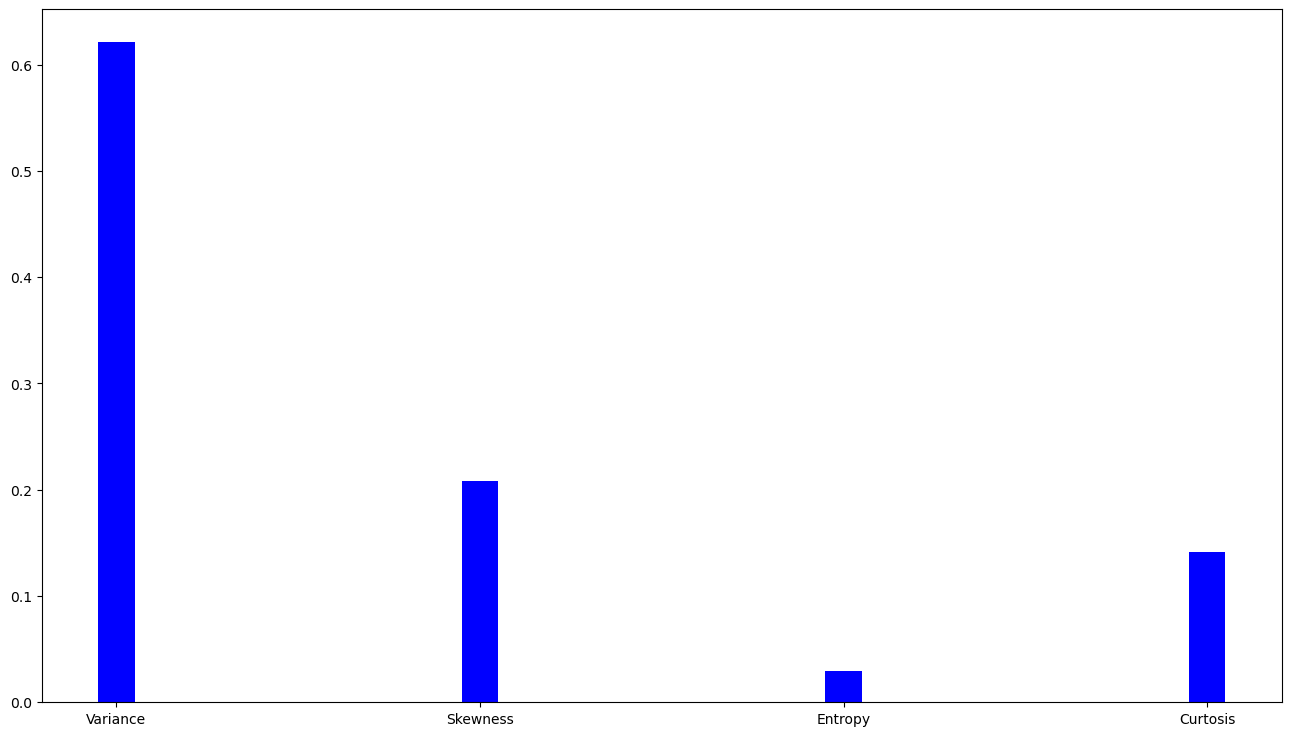

In [81]:
# plot bar plot to visualize importance
plt.figure(figsize=(16,9))
plt.bar(x.columns,dt.feature_importances_,width = 0.1,color = 'blue');